<a href="https://colab.research.google.com/github/SANDEEP1101/Transport_demand_prediction/blob/main/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
transport=pd.read_csv('/content/drive/MyDrive/transport data/Nairobi Transport Data.zip')

In [5]:
transport.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
transport.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [7]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
transport.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,KDWZQLQLSD,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [9]:
transport.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,KDWZQLQLSD,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [10]:
transport.shape

(51645, 10)

In [11]:
transport.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [12]:
len(transport['ride_id'].unique())

6249

Finding Our Target Variable Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each ride_id and that will be the number_of_ticket as our target variable

In [17]:
transport['seats_occupied']=transport.groupby(['car_type','travel_date','travel_time','travel_from'])['travel_time'].transform('count')
transport.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1


Now we found our target variable so let us delete the duplicate values from ride_id


In [15]:
transport=transport.drop_duplicates("ride_id")

In [18]:
cartype=transport['car_type'].value_counts()

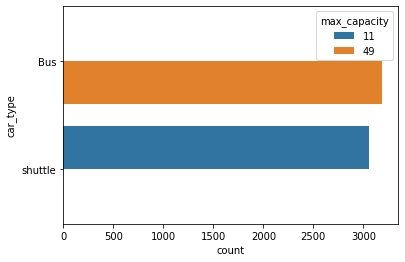

In [19]:
sns.countplot(y=transport['car_type'], hue=transport['max_capacity'])

Text(0.5, 1.0, 'Show the number of payment method')

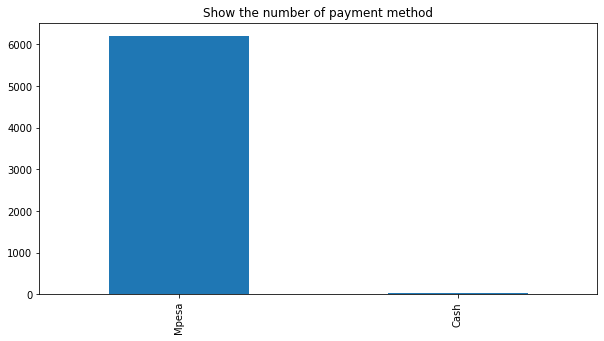

In [20]:
plt.subplots(figsize=(10,5))
transport.payment_method.value_counts().plot(kind='bar')
plt.title('Show the number of payment method')

Text(0.5, 1.0, 'travel')

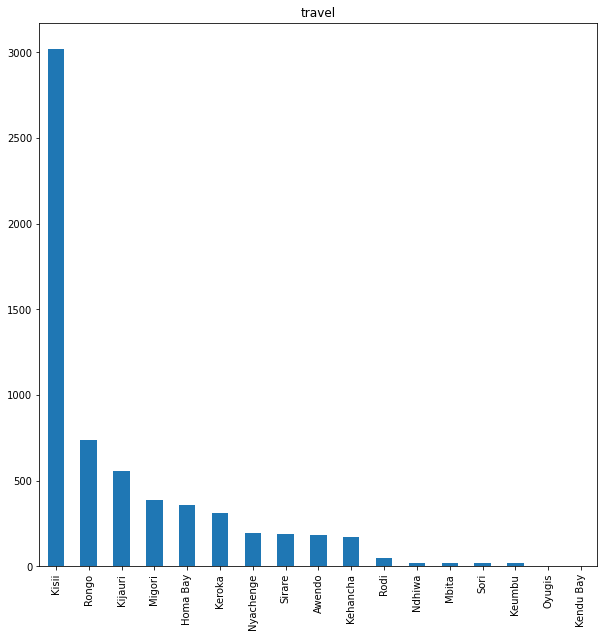

In [21]:
plt.subplots(figsize=(10,10))
transport.travel_from.value_counts().plot(kind='bar')
plt.title('travel')

In [22]:
transport["date"]=transport["travel_date"]+ " , "+transport["travel_time"]

In [23]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute

  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )  # A lambda function that find if a day is weekend
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [24]:
transport=time_features(transport)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [25]:
transport.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [26]:
transport=pd.get_dummies(transport,columns=['car_type',	'payment_method','travel_from'])

In [27]:
transport.head()

,ride_id,seat_number,payment_receipt,travel_date,travel_time,travel_to,max_capacity,seats_occupied,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,car_type_Bus,car_type_shuttle,payment_method_Cash,payment_method_Mpesa,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,15A,UZUEHCBUSO,17-10-17,7:15,Nairobi,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5437,14A,TIHLBUSGTE,19-11-17,7:12,Nairobi,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5710,8B,EQX8Q5G19O,26-11-17,7:05,Nairobi,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5777,19A,SGP18CL0ME,27-11-17,7:10,Nairobi,49,1,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5778,11A,BM97HFRGL9,27-11-17,7:12,Nairobi,49,1,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
correlarion=transport.corr()


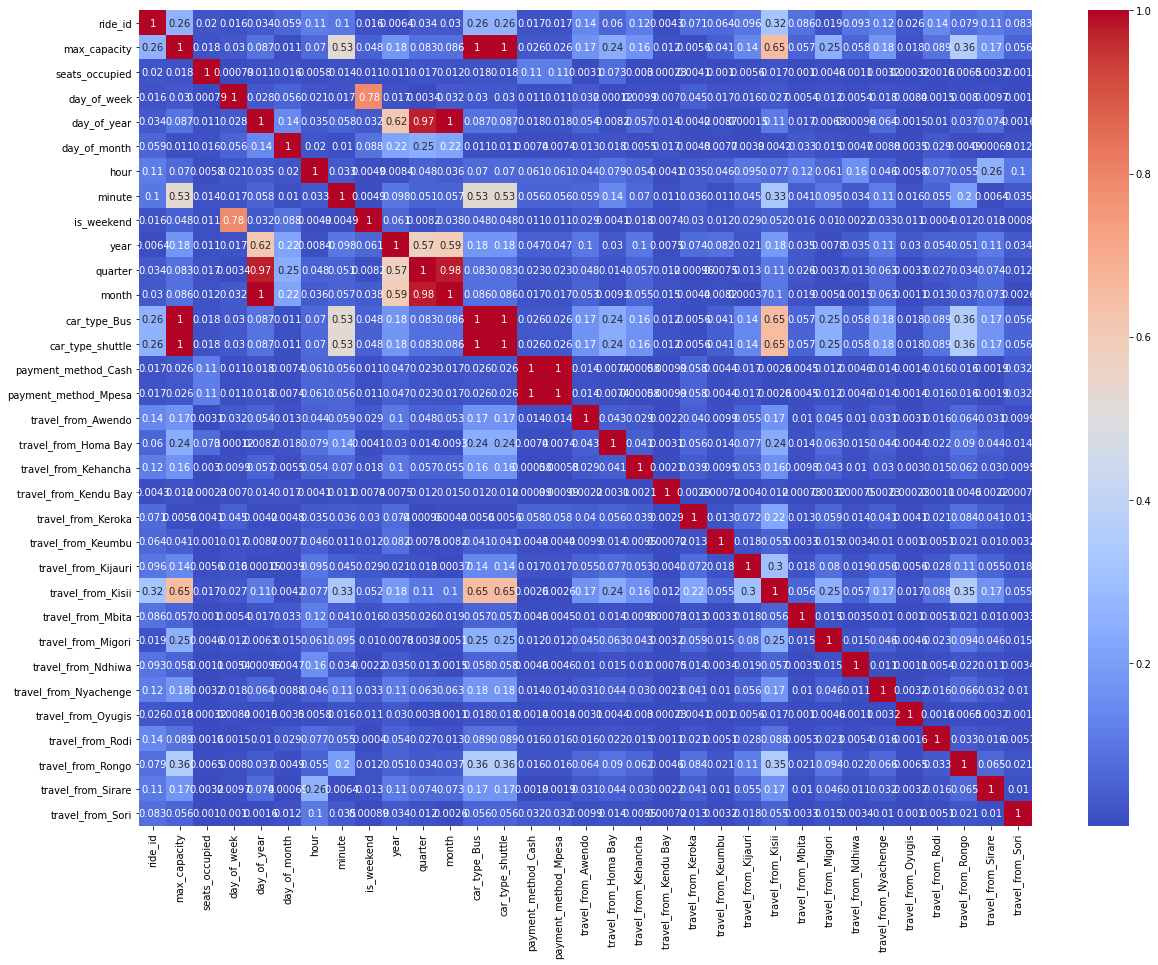

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(abs(correlarion),cmap='coolwarm',annot=True)

In [30]:
transport.shape

(6249, 40)

In [31]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 51644
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ride_id                6249 non-null   int64         
 1   seat_number            6249 non-null   object        
 2   payment_receipt        6249 non-null   object        
 3   travel_date            6249 non-null   object        
 4   travel_time            6249 non-null   object        
 5   travel_to              6249 non-null   object        
 6   max_capacity           6249 non-null   int64         
 7   seats_occupied         6249 non-null   int64         
 8   date                   6249 non-null   datetime64[ns]
 9   day_of_week            6249 non-null   int64         
 10  day_of_year            6249 non-null   int64         
 11  day_of_month           6249 non-null   int64         
 12  year_woy               6249 non-null   object        
 13  ho

In [38]:
unused_columns=['ride_id','seat_number','payment_receipt','date','year_woy','travel_date','travel_time','travel_to','seats_occupied','max_capacity']

In [39]:
dependent=transport['seats_occupied']

In [40]:
independent=transport.drop(unused_columns,axis=1).columns

In [41]:
independent

Index(['day_of_week', 'day_of_year', 'day_of_month', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'car_type_Bus',
       'car_type_shuttle', 'payment_method_Cash', 'payment_method_Mpesa',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori'],
      dtype='object')

In [42]:
len(independent)

30

In [43]:
X = transport[independent].apply(zscore)

In [45]:
y = np.log10(transport['seats_occupied'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4999, 30)
(1250, 30)


In [47]:
(y_train.shape)

(4999,)

In [48]:
(y_test.shape)

(1250,)

In [49]:
reg = LinearRegression().fit(X_train, y_train)

In [50]:
reg.score(X_train, y_train)

0.004515800030583383

In [51]:
reg.coef_

array([ 7.42837131e-05, -1.41009823e-02,  1.12613355e-03,  4.15857127e-06,
       -2.23785166e-05, -9.76625647e-05,  4.91623300e-05, -3.67660029e-04,
        1.46545881e-02, -1.62556467e+08, -1.62556467e+08,  3.70274357e+07,
        3.70274357e+07,  3.46217191e+08,  4.73452471e+08,  3.34188891e+08,
        2.58376897e+07,  4.44881134e+08,  1.15373836e+08,  5.81555484e+08,
        1.02075299e+09,  1.18213511e+08,  4.91741393e+08,  1.20985672e+08,
        3.56038154e+08,  3.65370870e+07,  1.83778220e+08,  6.59214201e+08,
        3.51612646e+08,  1.15373836e+08])

In [52]:
len(reg.coef_)

30

In [53]:
reg.intercept_

6.0425346112865614e-05

In [54]:
y_pred = reg.predict(X_test)

In [55]:
y_pred

array([-8.66342137e-05, -1.14290769e-04,  6.61920955e-05, ...,
       -8.42947314e-05, -6.24347279e-05, -5.32906518e-06])

In [56]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.0007959052339083857
RMSE : 0.02821179246181259


In [57]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.004321915146635158
Adjusted R2 :  -0.02018205740923107


implementing lasso and ridge

In [58]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso.score(X_train, y_train)

0.002696338217309857

In [60]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.00014178,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [61]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.045067076757351596, tolerance: 9.05963978597779e-06
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04505762232102821, tolerance: 9.05963978597779e-06
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.045053614497947536, toleran

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [62]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -1.8128344310550503e-05


In [63]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [64]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.000799797361626692
RMSE : 0.02828068884639644
R2 : -0.0005471397451610738
Adjusted R2 :  -0.025170941379578426


In [65]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 32, random_state = 0,max_depth=15)
regressor.fit(X_train,y_train)
preds = regressor.predict(X_train)
r2_score(y_train,preds)

0.7001353275685276

In [66]:
r2_score(y_test,regressor.predict(X_test))


0.8348288005404323